📘 Training Accuracy: 0.9686
🧪 Test Accuracy: 0.9534

📊 Classification Report:
              precision    recall  f1-score   support

        Spam       0.99      0.68      0.80       158
         Ham       0.95      1.00      0.97       957

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


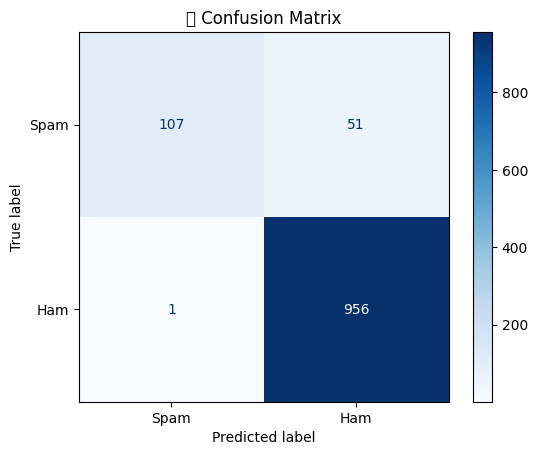


📬 Custom Message Prediction:
'Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!'
➡️ Prediction: Ham


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load and clean data
raw_mail_df = pd.read_csv(r"C:\Users\aaron\OneDrive\Desktop\2nd year padhai\DV study\DIP code\spam\mail_data.csv")
mail_df = raw_mail_df.where(pd.notnull(raw_mail_df), '')

# Label encoding
mail_df.loc[mail_df['Category'] == 'spam', 'Category'] = 0 
mail_df.loc[mail_df['Category'] == 'ham', 'Category'] = 1

# Features and Labels
X = mail_df['Message'] 
Y = mail_df['Category'].astype('int')  # Convert once

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_features, Y_train)

# Evaluate on training data
train_pred = model.predict(X_train_features)
accuracy_train = accuracy_score(Y_train, train_pred)
print(f"📘 Training Accuracy: {accuracy_train:.4f}")

# Evaluate on test data
test_pred = model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, test_pred)
print(f"🧪 Test Accuracy: {accuracy_test:.4f}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(Y_test, test_pred, target_names=['Spam', 'Ham']))

# Confusion Matrix
cm = confusion_matrix(Y_test, test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
disp.plot(cmap=plt.cm.Blues)
plt.title("📉 Confusion Matrix")
plt.show()

# Predict on a custom message
custom_msg = "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!"
custom_msg_transformed = feature_extraction.transform([custom_msg])
prediction = model.predict(custom_msg_transformed)[0]
print(f"\n📬 Custom Message Prediction:\n'{custom_msg}'\n Prediction: {'Spam' if prediction == 0 else 'Ham'}")
